In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df1=pd.read_csv("lung cancer.csv")

In [4]:
df=df1.copy()

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

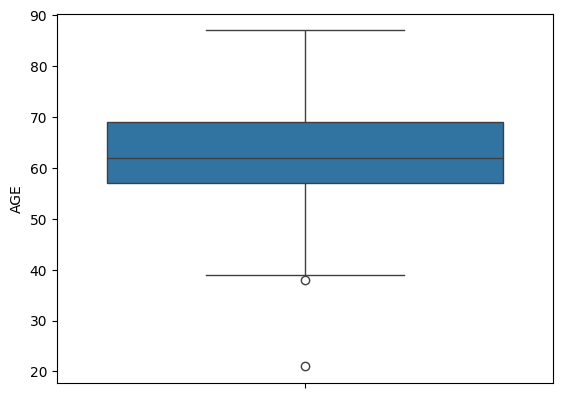

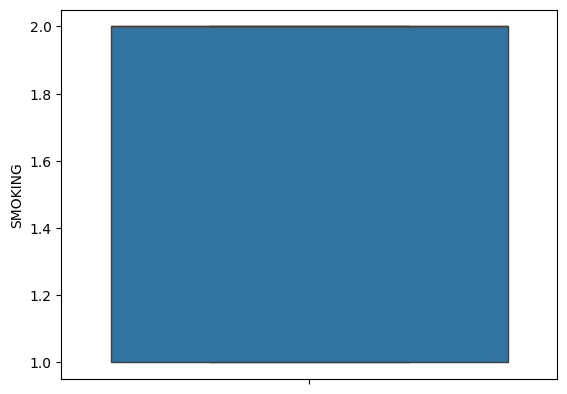

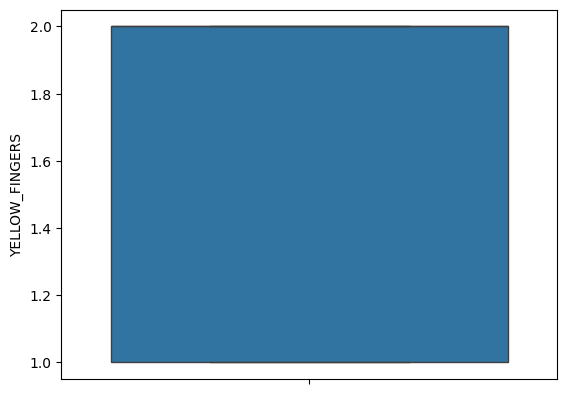

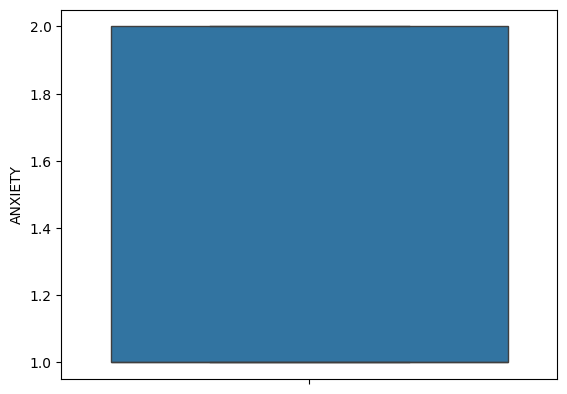

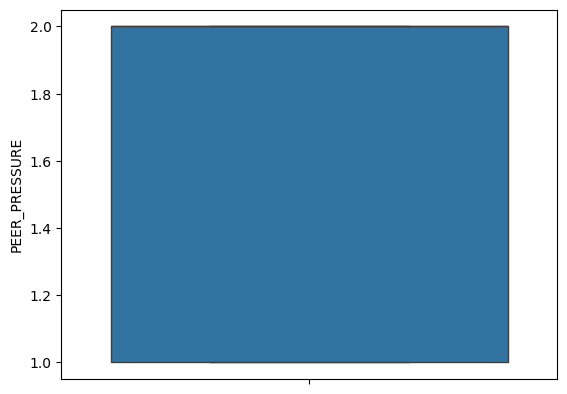

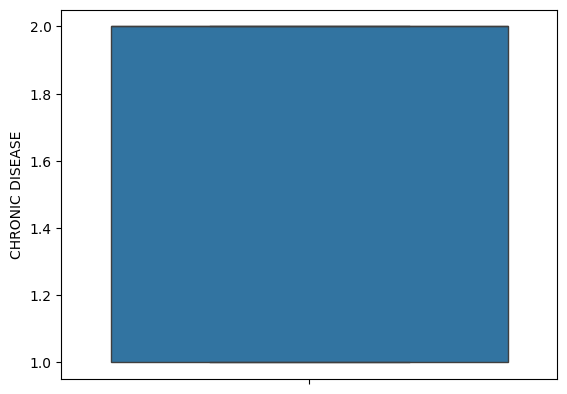

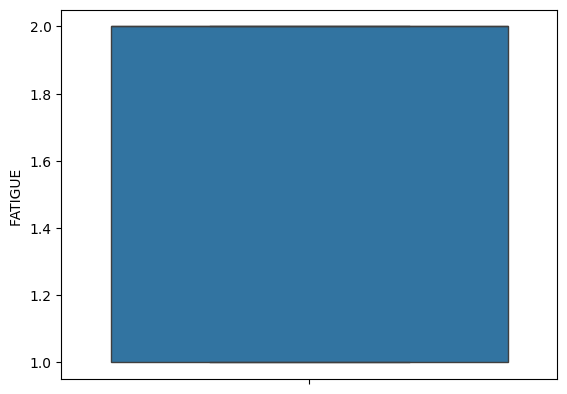

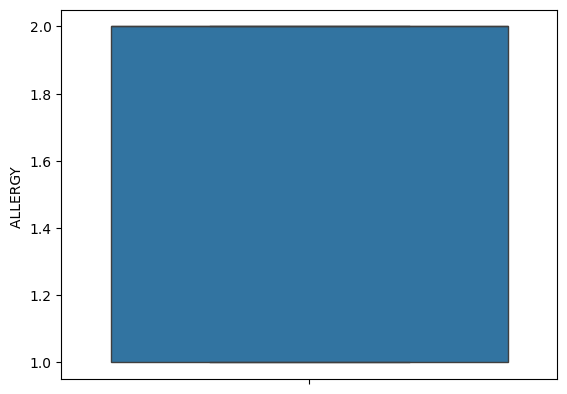

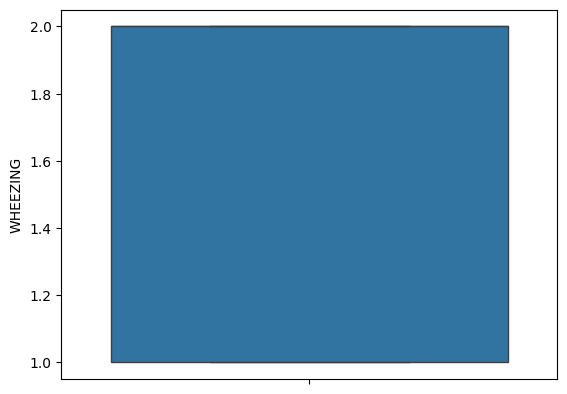

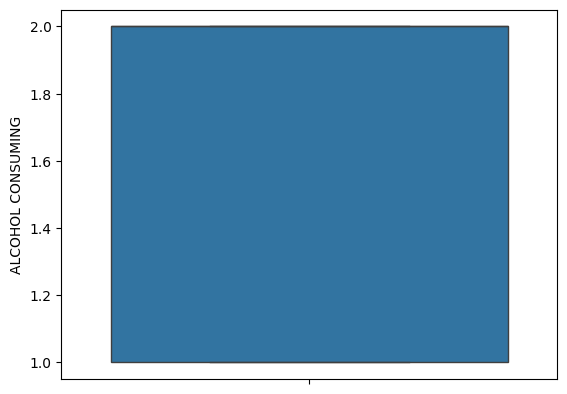

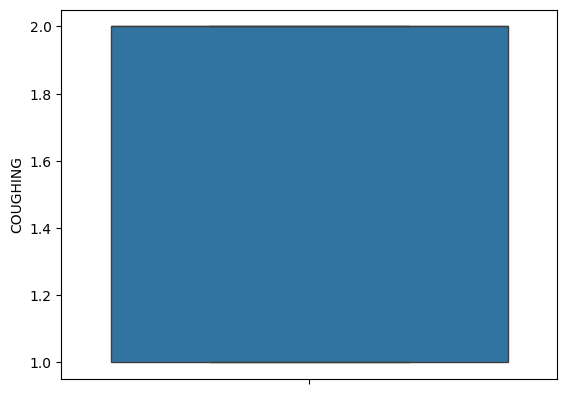

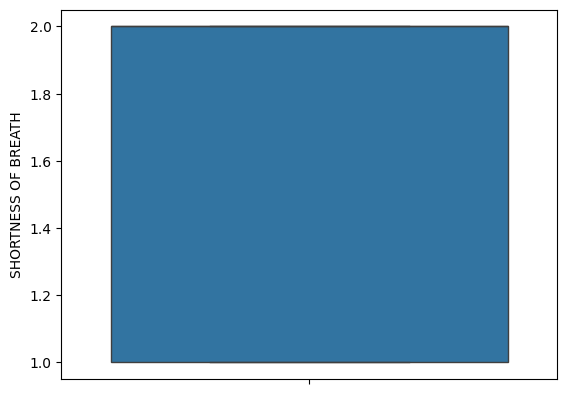

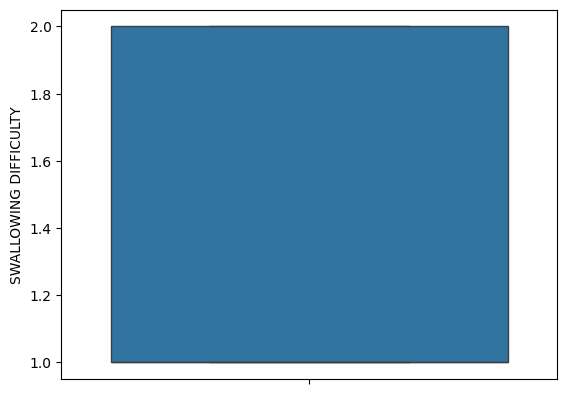

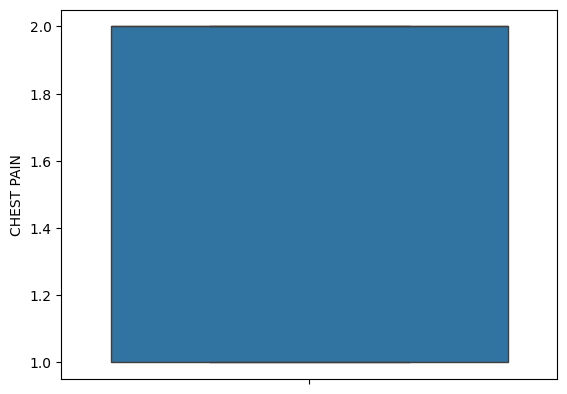

In [7]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(df[i])
    plt.show()

In [8]:
# cleare the out lets
def out(col):
    q1 , q3 = np.percentile(col,[25,75])
    iqr= q3 - q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    return ll , ul    

In [9]:
list_1=["AGE"]
for i in list_1:
    ll , ul = out(df[i])
    df[i]=np.where(df[i]<ll ,ll , df[i])
    df[i]=np.where(df[i]> ul , ul , df[i])



<Axes: ylabel='AGE'>

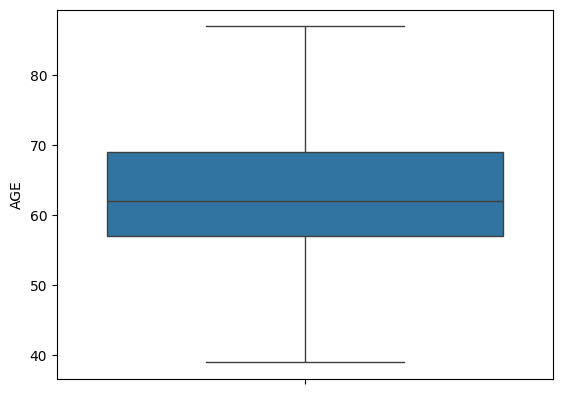

In [10]:
sns.boxplot(df["AGE"])


In [11]:
df.head(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,YES


In [12]:
#df = pd.get_dummies(df, columns=['GENDER'], drop_first=False)
d={"M":1,"F":0}
df["GENDER"]=df["GENDER"].map(d)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'GENDER' column
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [14]:
df.head(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2,1


In [15]:
x=df.drop(columns="LUNG_CANCER")
y=df["LUNG_CANCER"]

In [16]:
x.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69.0,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74.0,2,1,1,1,2,2,2,1,1,1,2,2,2


In [17]:
y.nunique()

2

In [18]:
y.head(1)

0    1
Name: LUNG_CANCER, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [20]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import setuptools

import distutils


In [22]:
# firt all librarese for doing dl

from tensorflow import keras  # Importing the Keras module from TensorFlow
from tensorflow.keras.models import Sequential  # Importing the Sequential model type
from tensorflow.keras.layers import Dense  # Importing the Dense layer for the neural network # dence only for heden layes makeing

from tensorflow.keras.activations import sigmoid, relu  # Importing activation functions: sigmoid and ReLU



In [23]:
pip show tensorflow


Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\sowmya\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [24]:
x.shape

(309, 15)

In [25]:
# create a object for sequwntial classs is the pur model name also
model=Sequential()

In [26]:
# ANN Architecture
# kernal_inktializer is give uodate weights  radomly 
# input_dim is for taking the rows only from thr data base stoping columns in the shape we have like this right (0,0) so we are taking through index
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu', input_dim=x.shape[1]))
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=16, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=4, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# in heare we only give the independent variables onl we dont pass dependent varibale meance i am training the data to x only not y


c:\Users\sowmya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705 (14.47 KB)

 Trainable params: 3,705 (14.47 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # we loss use when there is only 2 posible outcomes  for multiple we can give "categorical_cross_entropy"
model.fit(x_train, y_train, epochs=50, batch_size=15, validation_split=0.20)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.3511 - loss: 3.7676 - val_accuracy: 0.9200 - val_loss: 0.6879
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8752 - loss: 0.6876 - val_accuracy: 0.9200 - val_loss: 0.6835
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8831 - loss: 0.6836 - val_accuracy: 0.9200 - val_loss: 0.6793
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8016 - loss: 0.6824 - val_accuracy: 0.9200 - val_loss: 0.6748
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8380 - loss: 0.6775 - val_accuracy: 0.9200 - val_loss: 0.6700
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8519 - loss: 0.6729 - val_accuracy: 0.9200 - val_loss: 0.6651
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8480 - loss: 0.6693 - val_accuracy: 0.9200 - val_loss: 0.6607
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8378 - loss: 0.6663 - val_accuracy: 0.9200 - val_lo

In [30]:
print(model.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [31]:
model.history.history['accuracy']

[0.5482233762741089,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851371765,
 0.8324872851

In [32]:
model.history.history['val_accuracy']

[0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166893005,
 0.9200000166

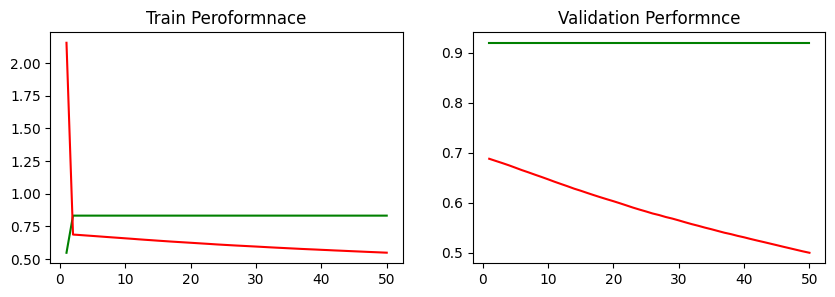

In [33]:
plt.figure(figsize=(10,3)) 
plt.subplot(1,2,1)
plt.title("Train Peroformnace")
plt.plot(np.arange(1,51),model.history.history['accuracy'],color='g',label='Trian_acc') # we want give the value 1,5 from what we pass in up side
plt.plot(np.arange(1,51),model.history.history['loss'],color='r',label='Train_loss')

plt.subplot(1,2,2)
plt.title("Validation Performnce")
plt.plot(np.arange(1,51),model.history.history['val_accuracy'],color='g',label='val_accuracy')
plt.plot(np.arange(1,51),model.history.history['val_loss'],color='r',label='val_loss')

In [34]:
d=[]
for i in x_test.columns:
  d.append(x_test[i][30])
print(d)

KeyError: 30

In [ ]:
y_test_pred=model.predict(x_test)
print(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
288    1
9      1
57     1
60     1
25     1
      ..
198    1
195    1
210    1
224    1
158    1
Name: LUNG_CANCER, Length: 62, dtype: int64


In [ ]:
c = []
for i in y_test_pred:
    if i > 0.5:
        c.append(1)
    else:
        c.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score , recall_score , precision_score
print(confusion_matrix(y_test,c))
print(precision_score(y_test,c))

[[ 0  2]
 [ 0 60]]
0.967741935483871


In [ ]:
print('accuracy_score :',accuracy_score(y_test,c))

accuracy_score : 0.967741935483871
